In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "Genesis Alpha"
SPLITS_FREQ = "7d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2019-12-04"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-04-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074549
2019-04-17,0.176471,0.254902,0.211765,0.176471,0.137255,0.020588,0.176471,0.307858,0.341385,0.465385,...,0.728431,0.821569,0.821569,0.566667,0.508333,0.539583,0.539583,0.539583,0.539583,0.132342
2019-04-24,0.000000,0.129630,0.133333,0.155556,0.174074,0.038333,0.000000,0.123505,0.150945,0.243627,...,0.398575,0.676516,0.973901,0.000000,0.198810,0.194437,0.283997,0.303228,0.303228,0.125686
2019-05-01,0.166667,0.222222,0.183333,0.158333,0.122222,0.024167,0.166667,0.200653,0.232139,0.295198,...,0.435417,0.494444,0.800000,0.229167,0.381667,0.421667,0.446667,0.446667,0.446667,0.129387
2019-05-08,0.071429,0.071429,0.100000,0.128571,0.114286,0.018571,0.071429,0.075817,0.129666,0.291838,...,0.640476,0.908333,0.961905,0.200000,0.366667,0.466667,0.466667,0.466667,0.466667,0.128639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068275
2020-11-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069388
2020-11-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068770


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-04-10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.073579
2019-04-17,1.0,0.705882,0.494118,0.252941,0.168627,0.025294,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.570588,0.917647,0.990196,1.000000,1.0,1.0,0.131107
2019-04-24,1.0,0.777778,0.611111,0.383333,0.266667,0.040000,1.0,1.0,1.0,1.0,...,0.987179,1.0,1.0,0.467369,0.790995,0.906288,0.987179,1.0,1.0,0.132569
2019-05-01,1.0,0.805556,0.583333,0.316667,0.211111,0.031667,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.471528,0.872917,0.968750,1.000000,1.0,1.0,0.130786
2019-05-08,1.0,0.595238,0.400000,0.200000,0.133333,0.020000,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.686905,0.953571,1.000000,1.000000,1.0,1.0,0.128819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.072518
2020-11-18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.072989
2020-11-25,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.072493


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2019-04-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074549,openpop
2019-04-17,0.176471,0.254902,0.211765,0.176471,0.137255,0.020588,0.176471,0.307858,0.341385,0.465385,...,0.821569,0.821569,0.566667,0.508333,0.539583,0.539583,0.539583,0.539583,0.132342,openpop
2019-04-24,0.000000,0.129630,0.133333,0.155556,0.174074,0.038333,0.000000,0.123505,0.150945,0.243627,...,0.676516,0.973901,0.000000,0.198810,0.194437,0.283997,0.303228,0.303228,0.125686,openpop
2019-05-01,0.166667,0.222222,0.183333,0.158333,0.122222,0.024167,0.166667,0.200653,0.232139,0.295198,...,0.494444,0.800000,0.229167,0.381667,0.421667,0.446667,0.446667,0.446667,0.129387,openpop
2019-05-08,0.071429,0.071429,0.100000,0.128571,0.114286,0.018571,0.071429,0.075817,0.129666,0.291838,...,0.908333,0.961905,0.200000,0.366667,0.466667,0.466667,0.466667,0.466667,0.128639,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068275,openpop
2020-11-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069388,openpop
2020-11-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068770,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2019-10-09,1.0,7d,2019-10-09,0.010340,0.014360,8.0,6.0,7.307692,0.538462,0.282051,...,0.928571,0.875000,0.875000,0.875000,0.875000,0.875000,0.125855,itemknn,test,NaN
2019-10-16,1.0,14d,2019-10-16,0.007582,0.013737,8.0,4.0,7.166667,0.416667,0.333333,...,0.800000,0.708333,0.708333,0.708333,0.708333,0.708333,0.125733,itemknn,test,NaN
2019-10-23,2.0,21d,2019-10-23,0.001099,0.015335,14.0,6.0,11.769231,0.076923,0.153846,...,0.250000,0.350000,0.450000,0.450000,0.450000,0.450000,0.128561,itemknn,test,NaN
2019-10-30,10.0,30d,2019-10-30,0.005794,0.013775,17.0,11.0,15.909091,0.272727,0.212121,...,0.777778,0.616667,0.641667,0.716667,0.716667,0.716667,0.128397,itemknn,test,NaN
2019-11-06,5.0,30d,2019-11-06,0.001388,0.015982,17.0,4.0,13.250000,0.000000,0.083333,...,0.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.119748,itemknn,test,NaN
2019-11-13,3.0,7d,2019-11-13,0.000965,0.018534,24.0,19.0,22.000000,0.294118,0.176471,...,0.450000,0.566667,0.566667,0.600000,0.600000,0.600000,0.131568,itemknn,test,NaN
2019-11-20,1.0,7d,2019-11-20,0.003423,0.010027,12.0,9.0,10.750000,0.375000,0.375000,...,0.833333,0.708333,0.708333,0.708333,0.708333,0.708333,0.125903,itemknn,test,NaN
2019-11-27,6.0,7d,2019-11-27,0.014979,0.015209,12.0,9.0,10.428571,0.142857,0.214286,...,0.291667,0.400000,0.466667,0.466667,0.466667,0.466667,0.127039,itemknn,test,NaN
2019-12-04,4.0,10YE,2019-12-04,0.036288,0.027534,9.0,4.0,7.500000,0.166667,0.203704,...,0.500000,0.625000,0.708333,0.750000,0.750000,0.750000,0.125220,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2019-10-09,1.0,7d,2019-10-09,0.010340,0.014360,8.0,6.0,7.307692,0.538462,0.282051,...,0.928571,0.875000,0.875000,0.875000,0.875000,0.875000,0.125855,itemknn,test,NaN
2019-10-16,1.0,14d,2019-10-16,0.007582,0.013737,8.0,4.0,7.166667,0.416667,0.333333,...,0.800000,0.708333,0.708333,0.708333,0.708333,0.708333,0.125733,itemknn,test,NaN
2019-10-23,2.0,21d,2019-10-23,0.001099,0.015335,14.0,6.0,11.769231,0.076923,0.153846,...,0.250000,0.350000,0.450000,0.450000,0.450000,0.450000,0.128561,itemknn,test,NaN
2019-10-30,10.0,30d,2019-10-30,0.005794,0.013775,17.0,11.0,15.909091,0.272727,0.212121,...,0.777778,0.616667,0.641667,0.716667,0.716667,0.716667,0.128397,itemknn,test,NaN
2019-11-06,5.0,30d,2019-11-06,0.001388,0.015982,17.0,4.0,13.250000,0.000000,0.083333,...,0.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.119748,itemknn,test,NaN
2019-11-13,3.0,7d,2019-11-13,0.000965,0.018534,24.0,19.0,22.000000,0.294118,0.176471,...,0.450000,0.566667,0.566667,0.600000,0.600000,0.600000,0.131568,itemknn,test,NaN
2019-11-20,1.0,7d,2019-11-20,0.003423,0.010027,12.0,9.0,10.750000,0.375000,0.375000,...,0.833333,0.708333,0.708333,0.708333,0.708333,0.708333,0.125903,itemknn,test,NaN
2019-11-27,6.0,7d,2019-11-27,0.014979,0.015209,12.0,9.0,10.428571,0.142857,0.214286,...,0.291667,0.400000,0.466667,0.466667,0.466667,0.466667,0.127039,itemknn,test,NaN
2019-12-04,4.0,10YE,2019-12-04,0.036288,0.027534,9.0,4.0,7.500000,0.166667,0.203704,...,0.500000,0.625000,0.708333,0.750000,0.750000,0.750000,0.125220,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

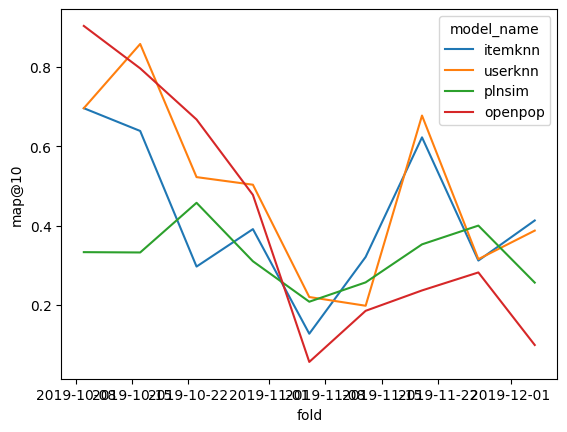

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2019-10-02,1,7d,2019-10-02,0.005970,0.147829,16,11,13.555556,0.222222,0.185185,0.244444,0.155556,...,0.888889,1.000000,1.0,0.500000,0.416667,0.416667,0.416667,0.416667,0.416667,0.131988
2019-10-09,1,14d,2019-10-09,0.015011,0.015465,8,6,7.285714,0.642857,0.309524,0.214286,0.121429,...,1.000000,1.000000,1.0,0.888889,0.900000,0.900000,0.900000,0.900000,0.900000,0.127038
2019-10-16,2,21d,2019-10-16,0.003186,0.014937,8,4,7.153846,0.538462,0.333333,0.246154,0.138462,...,1.000000,1.000000,1.0,0.928571,0.861111,0.861111,0.861111,0.861111,0.861111,0.126560
2019-10-23,10,30d,2019-10-23,0.001374,0.016233,14,6,11.928571,0.285714,0.166667,0.185714,0.142857,...,0.857143,1.000000,1.0,0.812500,0.780000,0.820000,0.820000,0.820000,0.820000,0.128554
2019-10-30,5,30d,2019-10-30,0.001546,0.013844,17,11,15.909091,0.363636,0.242424,0.200000,0.163636,...,0.776515,0.893939,1.0,0.708333,0.597222,0.618056,0.680556,0.680556,0.680556,0.127943
2019-11-06,3,7d,2019-11-06,0.003659,0.013239,17,6,14.272727,0.272727,0.181818,0.127273,0.154545,...,0.977273,1.000000,1.0,0.777778,0.616667,0.616667,0.616667,0.616667,0.616667,0.127197
2019-11-13,1,7d,2019-11-13,0.001390,0.018447,24,19,22.000000,0.352941,0.254902,0.211765,0.158824,...,0.759804,0.926471,1.0,0.458333,0.694444,0.722222,0.722222,0.722222,0.722222,0.131054
2019-11-20,6,7d,2019-11-20,0.015053,0.009997,12,9,10.750000,0.625000,0.416667,0.325000,0.162500,...,1.000000,1.000000,1.0,0.766667,0.833333,0.833333,0.833333,0.833333,0.833333,0.126125
2019-11-27,4,10YE,2019-11-27,0.034933,0.033006,12,5,9.722222,0.444444,0.314815,0.277778,0.211111,...,0.916667,1.000000,1.0,0.510417,0.568182,0.628788,0.628788,0.628788,0.628788,0.128042
